In [12]:
import os
import operator
import random
import calendar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from vixstructure.data import FuturesByMonth
from vixstructure.utils import parse_whole_directory_monthwise

mpl.rcParams["figure.figsize"] = 16, 9

In [2]:
def plot3d_loss(dataframe, zlim=None, rotation=225):
    X = dataframe.index.levels[0]
    Y = dataframe.index.levels[1]
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(
            np.array(list(map(lambda x: dataframe[x[0], x[1]], np.reshape(np.dstack((X,Y)), (X.shape[0]*X.shape[1],2))))),
            X.shape)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z, linewidth=None, antialiased=True, cmap=cm.coolwarm_r)
    ax.view_init(azim=rotation)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Width")
    ax.set_xlim(X[0,0], X[-1,-1])
    ax.set_ylim(Y[0,0], Y[-1,-1])
    ax.set_zlim(zlim)
    ax.set_zlabel("Loss", rotation=90)

In [3]:
naive_prediction = []
naive_prediction_test = []
naive_prediction_train = []
for month in range(1, 13):
    futures = FuturesByMonth("data/futures_per_year_and_month.h5", month, yearly=True, spreads=True)
    (x_train, y_train), (x_val, y_val), (x_test, y_test) = futures.splitted_dataset()
    mse = np.mean(np.square(x_val[:,month - 1] - y_val[:,0]))
    naive_prediction.append(mse)
    naive_prediction_test.append(np.mean(np.square(x_test[:,month - 1] - y_test[:,0])))
    naive_prediction_train.append(np.mean(np.square(x_train[:,month - 1] - y_train[:,0])))
naive = pd.DataFrame([naive_prediction_train, naive_prediction, naive_prediction_test],
                     columns=calendar.month_name[1:], index=["Training", "Validation", "Test"]).T

In [4]:
naive

,Training,Validation,Test
January,0.128959,0.034129,0.021595
February,0.135883,0.035440,0.021047
March,0.124055,0.025579,0.017777
April,0.215221,0.015699,0.034429
May,0.219204,0.015678,0.033568
June,0.161504,0.017682,0.021206
July,0.188856,0.054747,0.013939
August,0.074138,0.019385,0.018262
September,0.067586,0.018339,0.123145
October,0.078243,0.053764,0.073775


In [5]:
data = parse_whole_directory_monthwise("models/experiment09")

In [6]:
monthly_val = data.groupby(("depth", "width", "month")).min().groupby("month").min().iloc[:, [0, 2]]
monthly_val.index = naive.index

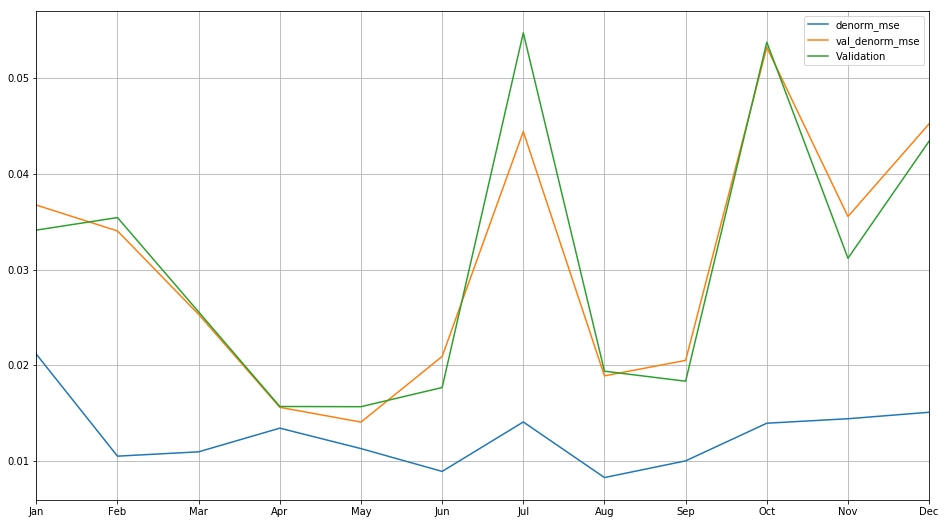

In [7]:
pd.concat((monthly_val, naive.Validation), axis=1).plot()
plt.xticks(np.arange(12), calendar.month_abbr[1:])
plt.grid()
plt.show()

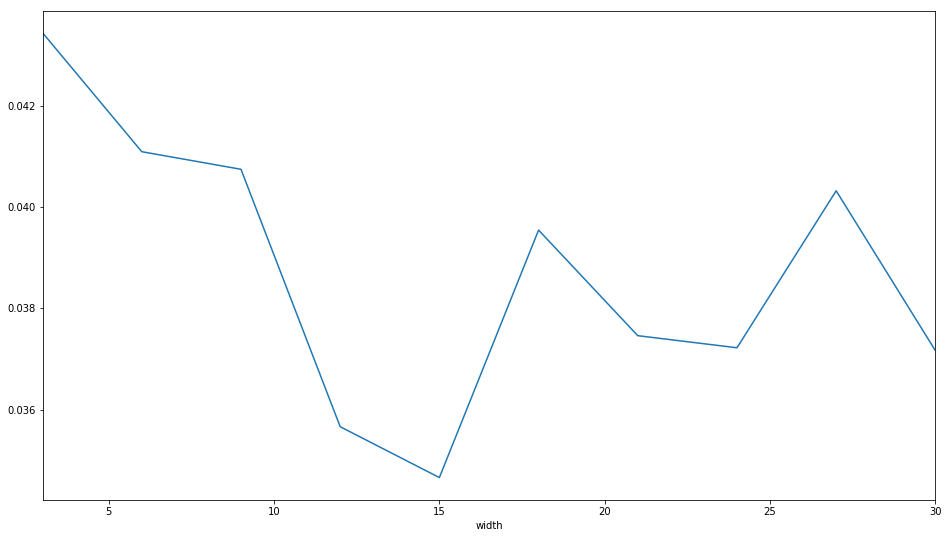

In [8]:
data.val_denorm_mse.groupby(("depth", "width", "month")).min().groupby(
    ("depth", "width")).mean().groupby("width").min().plot()
plt.show()

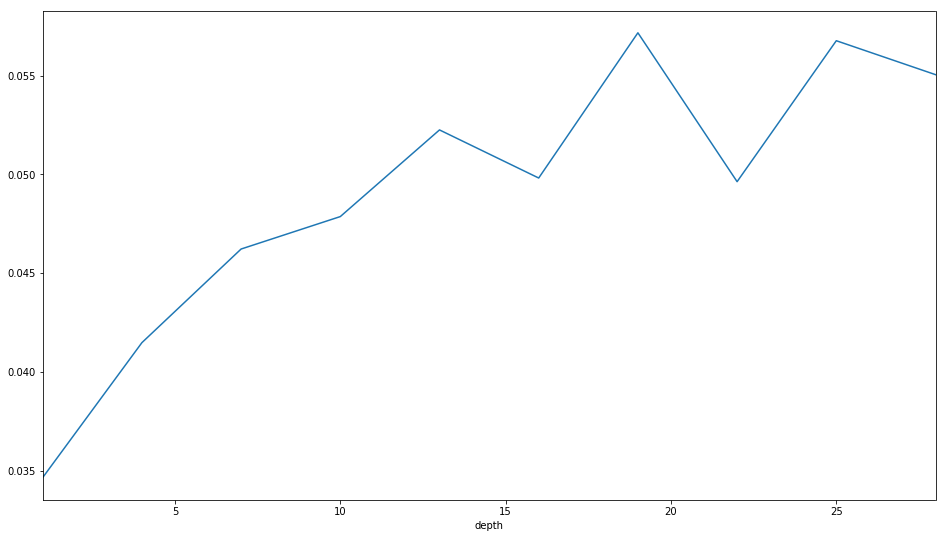

In [9]:
data.val_denorm_mse.groupby(("depth", "width", "month")).min().groupby(
    ("depth", "width")).mean().groupby("depth").min().plot()
plt.show()

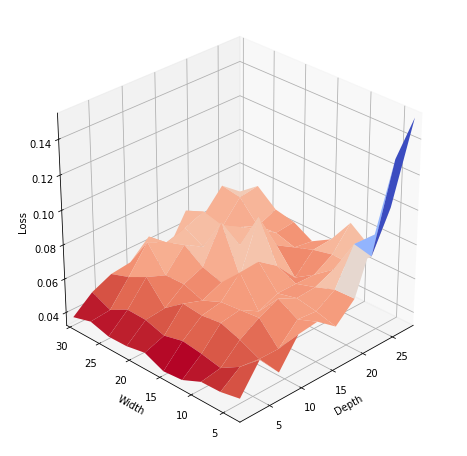

In [15]:
to_3dplot = data.val_denorm_mse.groupby(("depth", "width", "month")).min().groupby(
                ("depth", "width")).mean()
plot3d_loss(to_3dplot)
plt.show()

In [16]:
to_3dplot.idxmin()

(1, 15)